# 부천시 버스정보안내기 설치현황 데이터

In [1]:
import pandas as pd
import re

In [ ]:
# 파일 불러오기
bus_data = pd.read_csv('data/경기도 부천시_버스정보안내기설치현황_20200130.csv', encoding='euc-kr')

# 비어있는 columns 제거
bus_data = bus_data.iloc[:, [0,1,2,3,4,5,6]]
bus_data

# index -> columns['번호'] 변경
bus_data.set_index('번호', inplace=True)
bus_data

# 비어있는 rows 제거
bus_data = bus_data.dropna(axis=0, thresh=1)
bus_data

# columns의 NaN 개수 확인
# nan_bus_data = bus_data.isnull().sum(axis=0)
# print(nan_bus_data)

# columns의 NaN 삭제


# 부천시 버스정류소 데이터

In [2]:
import pandas as pd

# 파일 불러오기
bus_stops = pd.read_csv('data/버스정류소현황.csv')
# bus_stops
bucheon_bus_stops = bus_stops['시군명'] == '부천시'
bucheon_bus_stops = bus_stops[bucheon_bus_stops]
bucheon_bus_stops

# 경기도 전체 버스정류소 현황 -> 부천시 버스정류소 현황 csv 파일 저장
bucheon_bus_stops.to_csv("./output/버스정류소현황ver1(부천시).csv", index=False)
bucheon_bus_stops.head()

,시군명,정류소명,정류소영문명,정류소id,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도
8611,부천시,KCC스위첸아파트.한신아파트,"KCC Switzen Apartment, Hanshin Apartment",211000062,12097.0,노변정류장,경기도 부천시,NaN,37.475267,126.799667
8612,부천시,KEB하나은행도당동지점,KEB Hana Bank Dodang Branch,212000004,13292.0,노변정류장,경기도 부천시,NaN,37.516817,126.779700
8613,부천시,KEB하나은행도당동지점,KEB Hana Bank Dodang Branch,210000373,11256.0,노변정류장,경기도 부천시,NaN,37.516600,126.779817
8614,부천시,KT부천지사,KT Bucheon Branch,210000101,11231.0,노변정류장,경기도 부천시,NaN,37.486967,126.776200
8615,부천시,KT부천지사,KT Bucheon Branch,210000365,11222.0,노변정류장,경기도 부천시,NaN,37.486867,126.775250


In [3]:
import pandas as pd
import folium

df_bus = bucheon_bus_stops

# 부천시 지도 만들기
bucheon_map = folium.Map(location=[37.5034,126.7660], tiles='Stamen Terrain', 
                        zoom_start=12)

# 부천시 버스정류소 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df_bus.정류소명, df_bus.WGS84위도, df_bus.WGS84경도):
    folium.CircleMarker([lat, lng], 
                        popup=name,
                        radius=2
                       ).add_to(bucheon_map)
display(bucheon_map)

# 지도를 HTML 파일로 저장하기
# seoul_map.save('output/map_name.html')

1. 부천시 행정동(10개) 폴리라인 만들기
2. 부천시 행정동(10개) 버스정류소 위치 데이터 프레임 만들기


In [ ]:
import pandas as pd

df = pd.read_csv('data/시군별유동인구데이터(완료).csv', encoding='euc-kr')
df.head()

In [6]:
import pandas as pd

df = pd.read_csv('data/경기도 부천시_인구현황_20210331.csv', encoding='euc-kr', thousands = ',')
df['인구수 남자'] = df['인구수 남자'].astype('int')
df['인구수 여자'] = df['인구수 여자'].astype('int')
df['세대수'] = df['세대수'].astype('int')

df['인구수 합계'] = df['인구수 남자'] + df['인구수 여자'] # 인구수 남,여 합한 column 추가
df = df.iloc[1:11] # 부천 전체 데이터 제거
df


,행정기관,인구수 남자,인구수 여자,구성비 남자,구성비 여자,성비,세대수,세대당인구,인구수 합계
1,심곡동,32424,31403,3.99,3.86,103.25,33187,1.92,63827
2,부천동,44854,44713,5.52,5.50,100.32,38553,2.32,89567
3,중동,20611,21034,2.53,2.59,97.99,17541,2.37,41645
4,신중동,63203,67603,7.77,8.31,93.49,54222,2.41,130806
5,상동,42317,43809,5.20,5.39,96.59,30965,2.78,86126
6,대산동,40334,41101,4.96,5.05,98.13,36315,2.24,81435
7,소사본동,28041,28739,3.45,3.53,97.57,24148,2.35,56780
8,범안동,46847,48779,5.76,6.00,96.04,37226,2.57,95626
9,성곡동,41696,41561,5.13,5.11,100.32,35966,2.31,83257
10,오정동,43047,41062,5.29,5.05,104.83,36030,2.33,84109


In [7]:
import folium
import json
# display(df)

# geo_path = 'data/HangJeongDong_ver20210101(bucheon).geojson'
geo_path = 'data/HangJeongDong_bucheon.json'

try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
# display(geo_data)
    
# 경기도 지도 만들기
g_map= folium.Map(location=[37.5034,126.7660], 
                   tiles='Stamen Terrain', zoom_start=12)

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data = geo_data,               # 지도 경계
                 data = df['인구수 합계'],        # 표시하려는 데이터
                 columns = [df.index, df['인구수 합계']],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.3, line_opacity=0.9,
#                  threshold_scale=[10000, 100000, 300000, 500000, 700000],              
                 key_on='feature.properties.adm_nm',
                 ).add_to(g_map)

display(g_map)

,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
운영장소,,,,,,,,,,
상동역,0.0,0.0,342,0,0,178,13,55,184,8
시청역,0.0,0.0,430,0,7,276,74,414,386,47
신중동역,0.0,0.0,249,0,3,124,18,202,155,1
부천역,0.0,0.0,184,0,6,110,29,130,104,2
송내역,0.0,0.0,111,0,0,45,0,100,54,1
부천시청,0.0,0.0,73,0,6,31,27,43,32,0
굴포천,0.0,0.0,79,0,0,4,0,78,63,0


<AxesSubplot:xlabel='운영장소'>

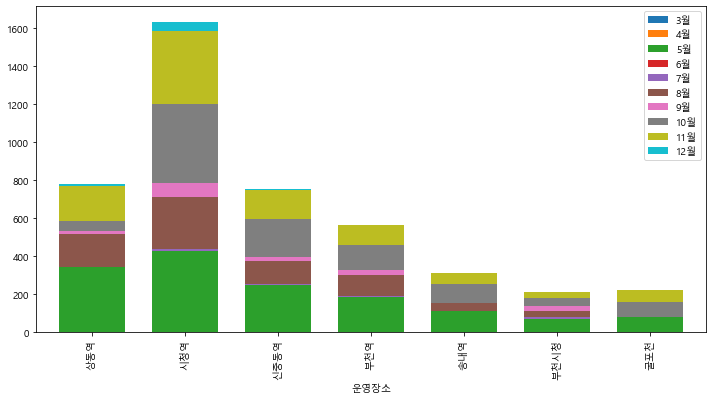

In [10]:
df_2020 = pd.read_excel('data/publicbike/2020년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소',sheet_name = 2, skiprows=[0,1], usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
df_2020 = df_2020.fillna(0) # NaN -> 0 변경

# 총계 행과열 제거
df_2020.drop(['총계'], axis=0, inplace=True)
df_2020.drop(['총계'], axis=1, inplace=True)

display(df_2020)

from matplotlib import pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "data/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 막대그래프
df_2020.plot(kind='bar', figsize=(12, 6), width=0.7, stacked=True )

<AxesSubplot:>

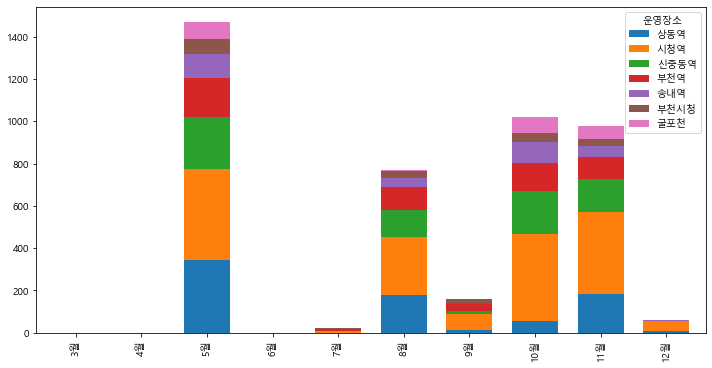

In [26]:
df_2020_T = df_2020.T
df_2020_T
df_2020_T.plot(kind='bar', figsize=(12, 6), width=0.7, stacked=True )

,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
운영장소,,,,,,,,,,
상동역,313,415,542,455,633,709,560,548,391,215
시청역,444,468,618,612,601,703,622,640,447,319
신중동역,206,301,371,358,424,524,460,408,314,188
부천역,168,207,247,415,388,393,329,392,184,91
송내역,135,161,214,157,254,225,236,197,144,91
부천시청,57,58,123,114,107,124,109,151,104,44
굴포천,85,105,107,155,64,94,125,231,117,7


<AxesSubplot:ylabel='운영장소'>

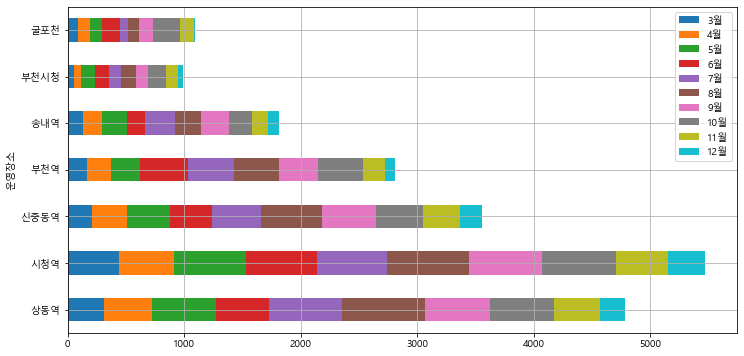

In [13]:
df_2019 = pd.read_excel('data/publicbike/2019년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소', sheet_name = 0, skiprows=[0,1,11,12,13,14,15,16,17,18], usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
df_2019 = df_2019.fillna(0) # NaN -> 0 변경
df_2019.drop(['총계'], axis=0, inplace=True)
df_2019.drop(['총계'], axis=1, inplace=True)

display(df_2019)

# 막대그래프
# import seaborn as sns
# mycolors = sns.color_palette('coolwarm')
df_2019.plot(kind='barh', figsize=(12, 6), width=0.5, stacked=True, grid=True) # , color=mycolors

<AxesSubplot:>

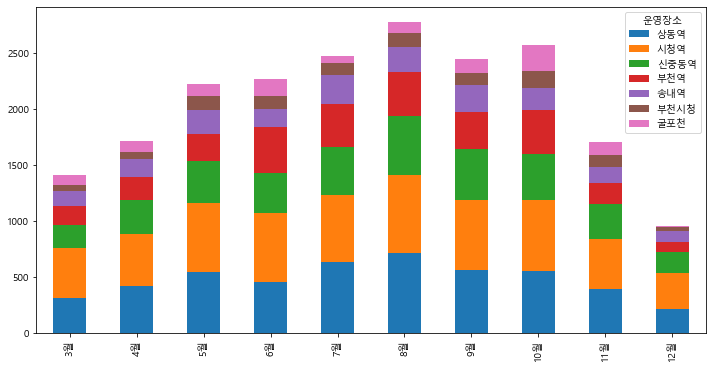

In [14]:
df_2019_T = df_2019.T
df_2019_T
df_2019_T.plot(kind='bar', figsize=(12, 6), width=0.5, stacked=True )

,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
운영장소,,,,,,,,,,
상동역,404,356,420,419,467.0,491,489.0,501,311.0,128.0
시청역,373,445,512,544,565.0,636,605.0,689,418.0,224.0
신중동역,272,289,286,329,381.0,405,370.0,400,257.0,129.0
부천역,271,309,244,228,227.0,302,266.0,332,142.0,56.0
송내역,146,164,191,198,180.0,192,163.0,170,94.0,37.0
부천시청,95,154,151,142,143.0,119,134.0,140,86.0,53.0
굴포천,70,80,139,121,72.0,46,154.0,113,82.0,0.0


<AxesSubplot:ylabel='운영장소'>

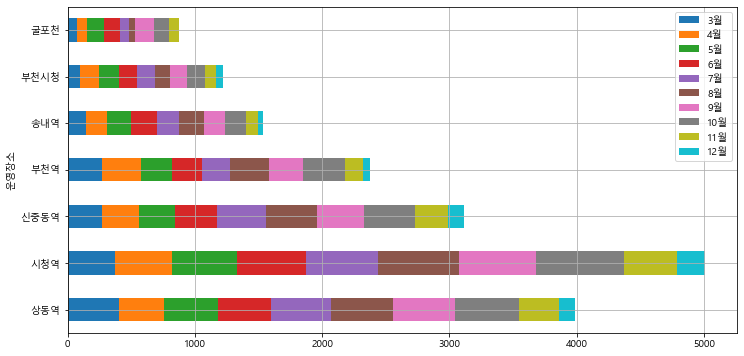

In [15]:
df_2018 = pd.read_excel('data/publicbike/2018년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소', sheet_name = 0, skiprows=[0,1], usecols=[0,2,3,4,5,6,7,8,9,10,11])
df_2018 = df_2018.fillna(0) # NaN -> 0 변경
df_2018 = df_2018.iloc[1:8]
display(df_2018)

# 막대그래프
df_2018.plot(kind='barh', figsize=(12, 6), width=0.5, stacked=True, grid=True) # , color=mycolors

<AxesSubplot:>

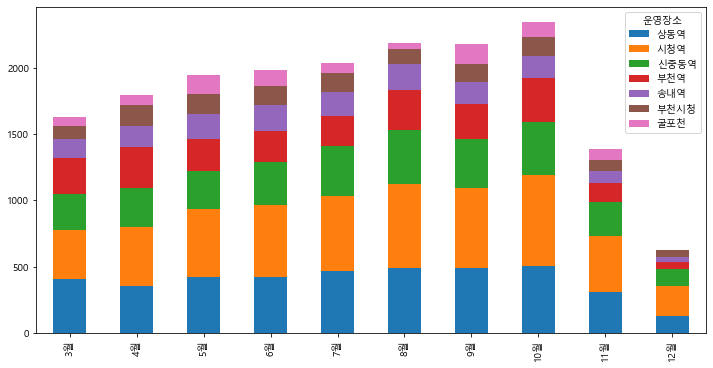

In [16]:
df_2018_T = df_2018.T
df_2018_T
df_2018_T.plot(kind='bar', figsize=(12, 6), width=0.5, stacked=True )

,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
운영장소,,,,,,,,,,
상동역,234,225,304,343,363,519,165,379,308,142
시청역,212,285,388,484,484,432,821,458,327,136
신중동역,160,203,317,280,302,382,147,304,298,112
부천역,90,125,137,174,145,239,82,146,120,87
송내역,40,72,92,114,114,136,48,111,151,45
부천시청,140,206,168,264,160,199,79,241,223,82
굴포천,0,0,0,101,103,68,13,48,73,0


<AxesSubplot:ylabel='운영장소'>

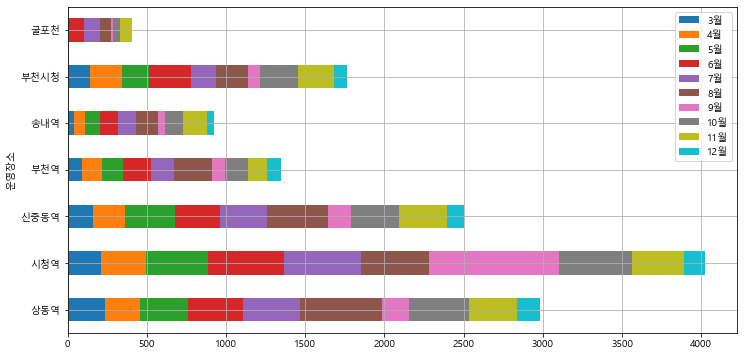

In [17]:
df_2017 = pd.read_excel('data/publicbike/2017년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소', sheet_name = 2, skiprows=[0,1], usecols=[0,2,3,4,5,6,7,8,9,10,11])
df_2017 = df_2017.fillna(0) # NaN -> 0 변경
df_2017 = df_2017.iloc[1:8]
display(df_2017)

# 막대그래프
df_2017.plot(kind='barh', figsize=(12, 6), width=0.5, stacked=True, grid=True) # , color=mycolors

<AxesSubplot:>

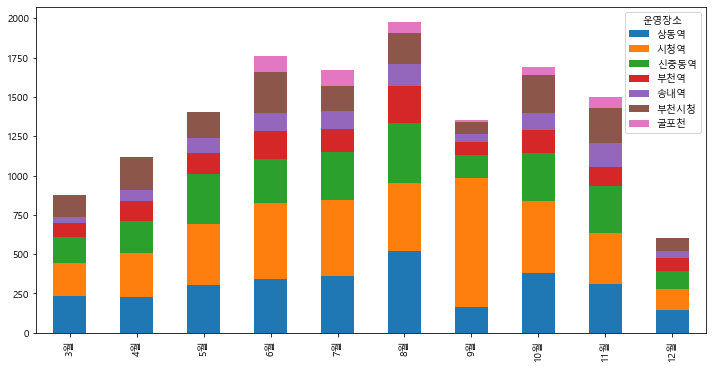

In [18]:
df_2017_T = df_2017.T
df_2017_T
df_2017_T.plot(kind='bar', figsize=(12, 6), width=0.5, stacked=True )

,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
운영장소,,,,,,,,,,
상동역,145.0,161.0,175.0,139.0,200,207,287,233,148,95
시청역,162.0,208.0,302.0,264.0,250,322,352,267,227,192
신중동역,86.0,118.0,99.0,93.0,191,228,192,186,109,60
부천역,0.0,34.0,77.0,72.0,119,184,144,175,110,55
송내역,0.0,23.0,55.0,59.0,140,126,106,109,87,68
부천시청,0.0,0.0,0.0,0.0,18,62,112,141,127,44


<AxesSubplot:ylabel='운영장소'>

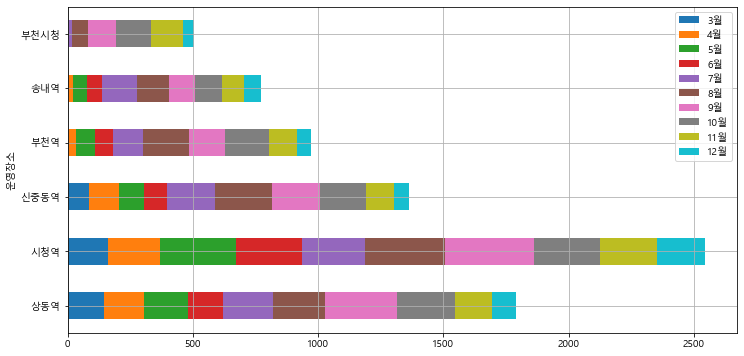

In [19]:
df_2016 = pd.read_excel('data/publicbike/2016년 공공자전거 무료대여소(바이크 스테이션)운영실적.xlsx', index_col='운영장소', sheet_name = 2, skiprows=[0,1], usecols=[0,2,3,4,5,6,7,8,9,10,11])
df_2016 = df_2016.fillna(0) # NaN -> 0 변경
df_2016 = df_2016.iloc[1:8]
display(df_2016)

# 막대그래프
df_2016.plot(kind='barh', figsize=(12, 6), width=0.5, stacked=True, grid=True) # , color=mycolors

<AxesSubplot:>

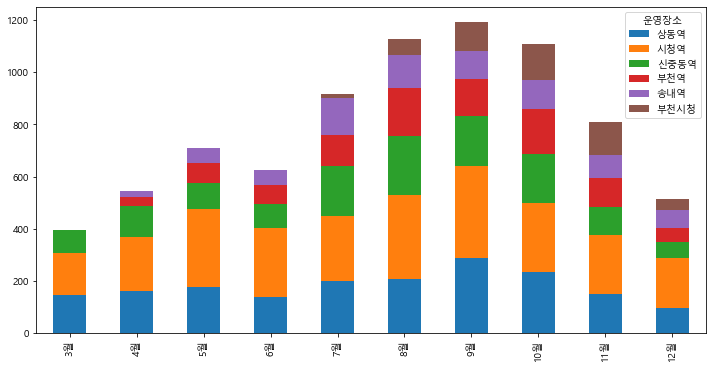

In [25]:
df_2016_T = df_2016.T
df_2016_T
df_2016_T.plot(kind='bar', figsize=(12, 6), width=0.5, stacked=True )

In [24]:
# 2016 ~ 2020 월별 이용현황 데이터프레임 csv로 저장

df_2016.to_csv('output/2016년 부천시 자전거 무료대여소 월별 이용현황.csv')
df_2017.to_csv('output/2017년 부천시 자전거 무료대여소 월별 이용현황.csv')
df_2018.to_csv('output/2018년 부천시 자전거 무료대여소 월별 이용현황.csv')
df_2019.to_csv('output/2019년 부천시 자전거 무료대여소 월별 이용현황.csv')
df_2020.to_csv('output/2020년 부천시 자전거 무료대여소 월별 이용현황.csv')

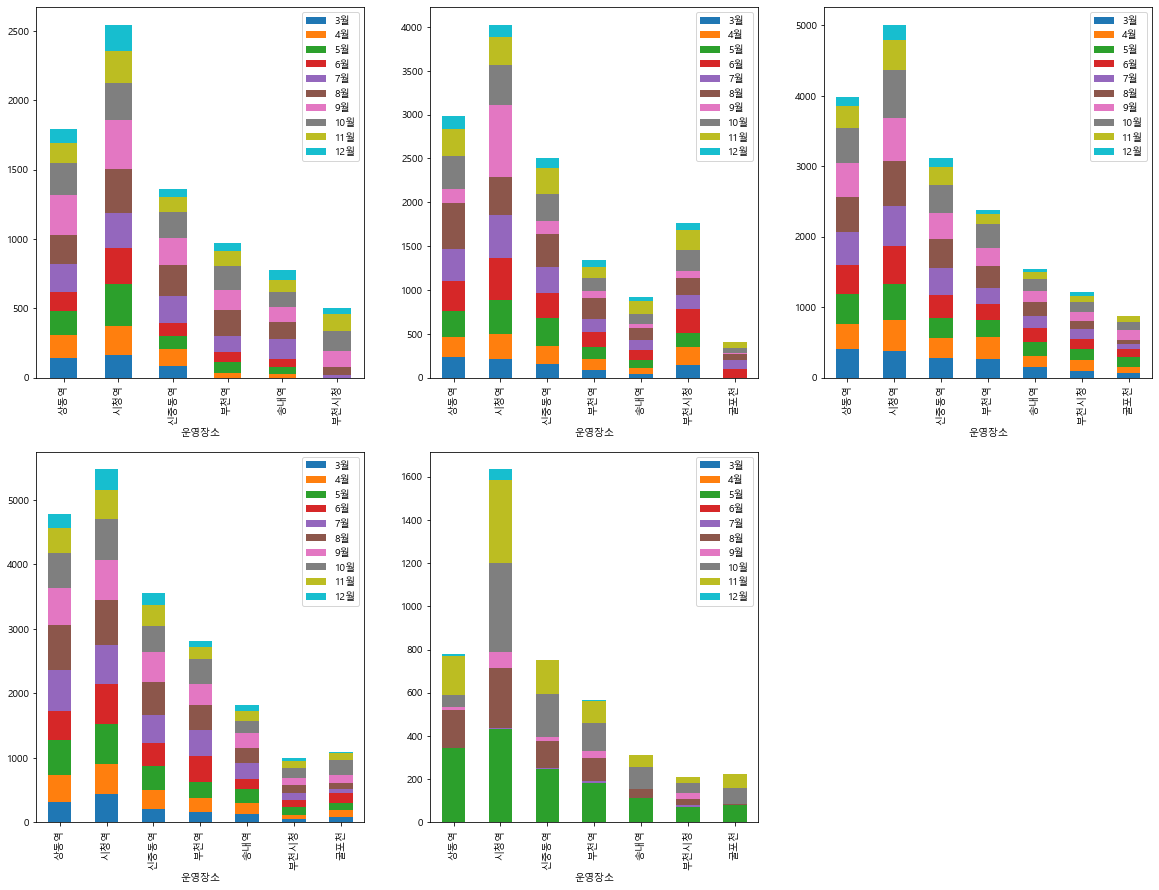

In [27]:
# 그래프 객체 생성 (figure에 5개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 15))   
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)

df_2016.plot(kind='bar', width=0.5, stacked=True, ax=ax1)
df_2017.plot(kind='bar', width=0.5, stacked=True, ax=ax2)
df_2018.plot(kind='bar', width=0.5, stacked=True, ax=ax3)
df_2019.plot(kind='bar', width=0.5, stacked=True, ax=ax4)
df_2020.plot(kind='bar', width=0.5, stacked=True, ax=ax5)

# png 저장
plt.savefig("output/부천시 자전거 무료대여소별 이용현황 그래프(2016 ~ 2020).png")

NameError: name 'df_2020_T' is not defined

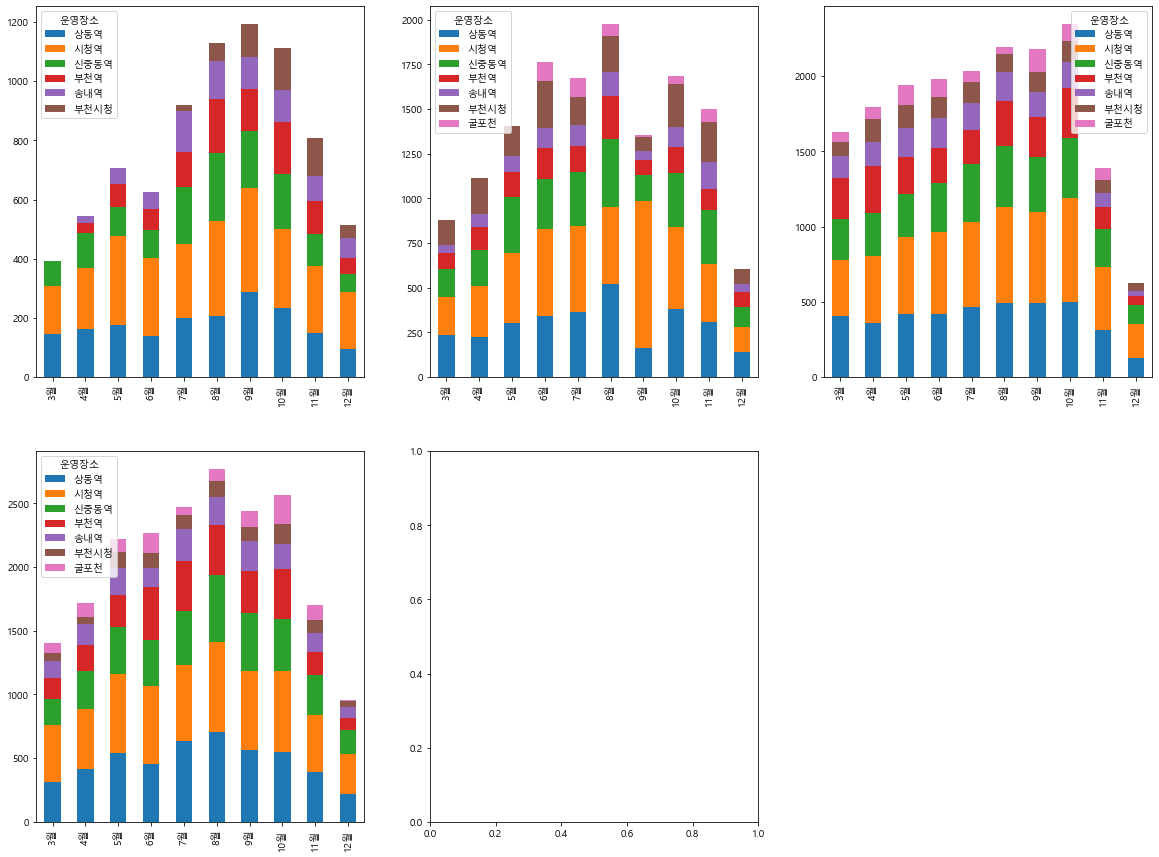

In [23]:
# 그래프 객체 생성 (figure에 5개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 15))   
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)

df_2016_T.plot(kind='bar', width=0.5, stacked=True, ax=ax1)
df_2017_T.plot(kind='bar', width=0.5, stacked=True, ax=ax2)
df_2018_T.plot(kind='bar', width=0.5, stacked=True, ax=ax3)
df_2019_T.plot(kind='bar', width=0.5, stacked=True, ax=ax4)
df_2020_T.plot(kind='bar', width=0.5, stacked=True, ax=ax5)

# png 저장
plt.savefig("output/부천시 자전거 월별 이용현황 그래프(2016 ~ 2020).png")